In [ ]:
! pip install pandas matplotlib seaborn scikit-learn


## Importing Libraries

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
# Load dataset
df = pd.read_csv('churn_data.csv')

print(df.head())
print(df.tail())

   customerID  tenure PhoneService        Contract              PaymentMethod  \
0  7590-VHVEG       1           No  Month-to-month           Electronic check   
1  5575-GNVDE      34          Yes        One year               Mailed check   
2  3668-QPYBK       2          Yes  Month-to-month               Mailed check   
3  7795-CFOCW      45           No        One year  Bank transfer (automatic)   
4  9237-HQITU       2          Yes  Month-to-month           Electronic check   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes  
      customerID  tenure PhoneService        Contract  \
7038  6840-RESVB      24          Yes        One year   
7039  2234-XADUH      72          Yes        One year   
7040  4801-JZAZL      11           No  Month-to-month   
7041  8361-LTMKD       4          Yes  Month-

# 1. Business Understanding

## Data preprocesing

In [78]:

# Drop customerID - not useful for modeling
df = df.drop('customerID', axis=1)

# binary Churn, categorical variables to numerical conversions
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=['PhoneService', 'Contract', 'PaymentMethod'], drop_first=True)



## Standardization and Model Training

In [79]:
# Split data into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train ML model - Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# predictions on the test set
y_pred = model.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report_str)

Accuracy: 0.79
Confusion Matrix:
[[930 106]
 [183 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.64      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



## Plot the confusion matrix as a heatmap

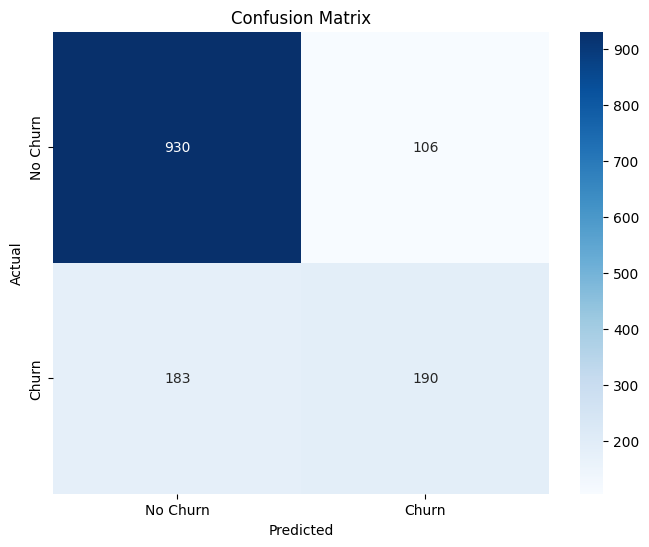

In [80]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. Data UNderstanding - EDA

# Histogram with the target (Churn) as the hue for a numeric column

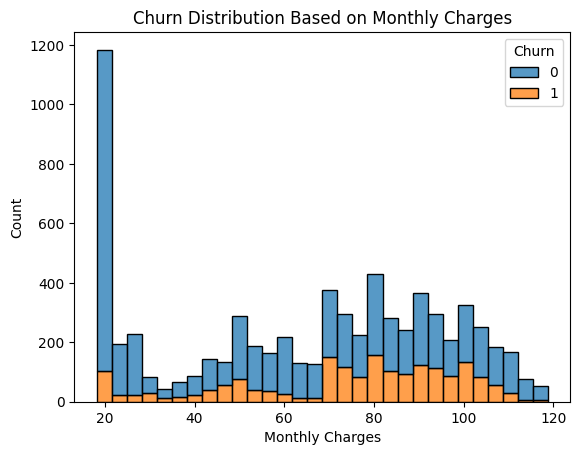

In [81]:


sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Churn Distribution Based on Monthly Charges')
plt.show()

## Bar plots for categorical columns with the target (Churn)

Unique values in PhoneService_Yes: ['False' 'True']
Unique values in Contract_One year: ['False' 'True']
Unique values in Contract_Two year: ['False' 'True']
Unique values in PaymentMethod_Credit card (automatic): ['False' 'True']
Unique values in PaymentMethod_Electronic check: ['True' 'False']
Unique values in PaymentMethod_Mailed check: ['False' 'True']
PhoneService_Yes                         object
Contract_One year                        object
Contract_Two year                        object
PaymentMethod_Credit card (automatic)    object
PaymentMethod_Electronic check           object
PaymentMethod_Mailed check               object
Churn                                     int64
dtype: object


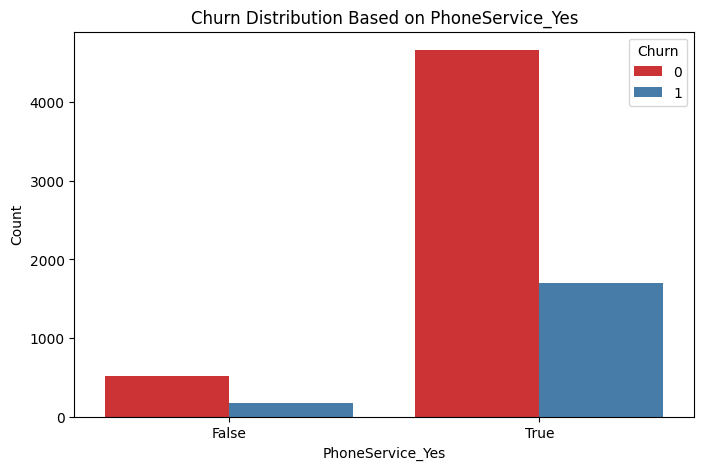

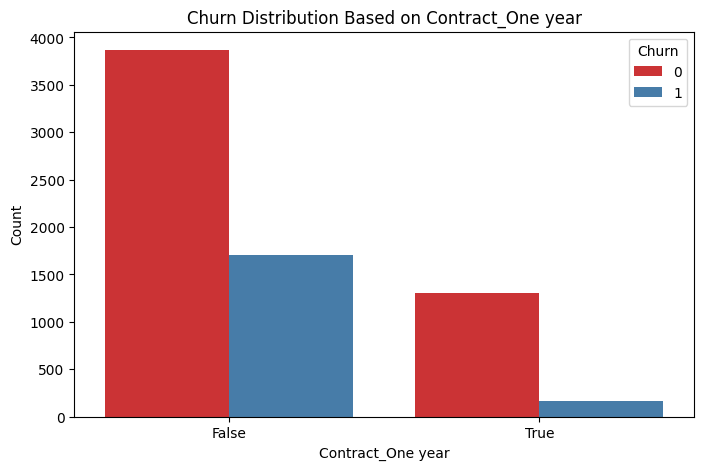

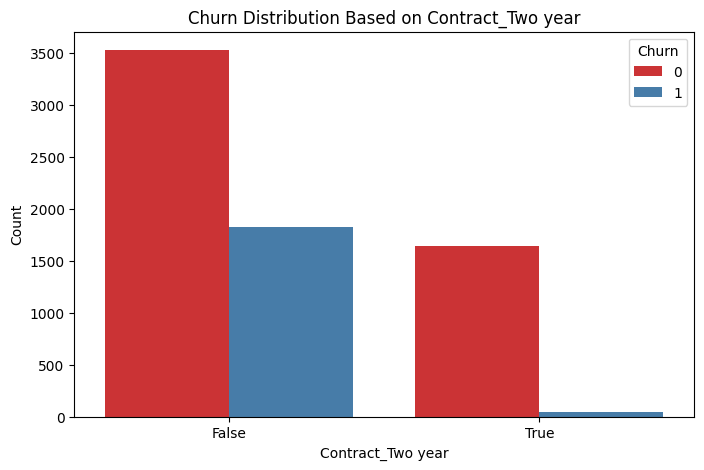

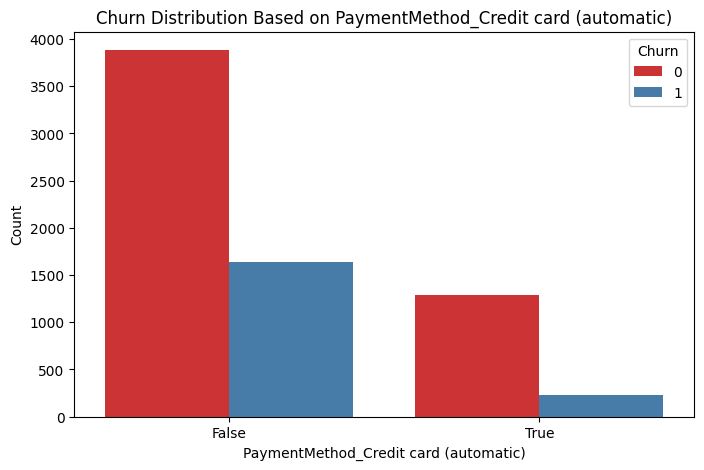

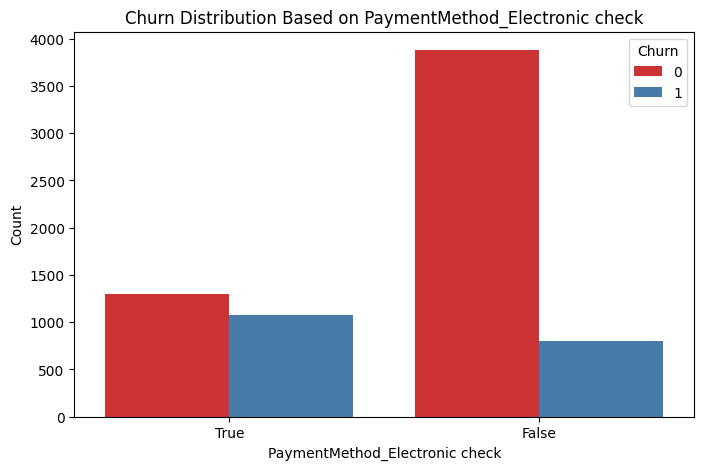

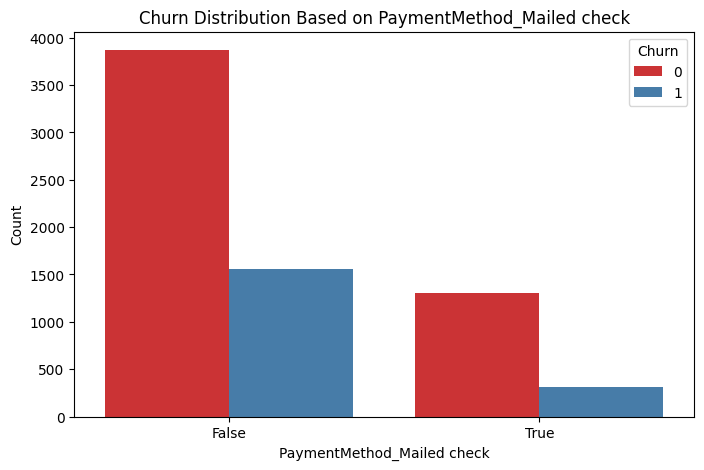

In [82]:

categorical_columns = ['PhoneService_Yes', 'Contract_One year', 'Contract_Two year','PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Convert boolean columns to strings
bool_columns = ['PhoneService_Yes', 'Contract_One year', 'Contract_Two year','PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for column in bool_columns:
    df[column] = df[column].astype(str)

# Check unique values in categorical columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

# Check data types of columns used in countplot
print(df[categorical_columns + ['Churn']].dtypes)

# Plot countplot for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue='Churn', palette='Set1')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Churn Distribution Based on {column}')
    plt.show()


# Advanced EDA and Visualizations

In [83]:
# Filtering
high_tenure = df[df['tenure'] > 50].copy()

# Combining filters using & (and) and | (or) operators
high_tenure_high_monthly_charges = df[(df['tenure'] > 50) & (df['MonthlyCharges'] > 70)].copy()

high_tenure_high_monthly_charges

,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
12,58,100.35,5681.10,0,True,True,False,True,False,False
15,69,113.25,7895.15,0,True,False,True,True,False,False
17,71,106.70,7382.25,0,True,False,True,False,False,False
28,72,90.25,6369.45,0,True,False,True,True,False,False
30,71,96.35,6766.95,0,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
7022,72,104.95,7544.30,0,True,True,False,False,True,False
7023,63,103.50,6479.40,0,True,False,False,False,True,False
7034,67,102.95,6886.25,1,True,False,False,True,False,False
7039,72,103.20,7362.90,0,True,True,False,True,False,False


In [87]:
df.info()

# Proportions of Churn for different groups
df.shape

churn_df = df[df['Churn'] == 1]
no_churn_df = df[df['Churn'] == 0]

churn_group_proportions = churn_df['PhoneService_Yes'].value_counts(normalize=True)
no_churn_group_proportions = no_churn_df['PhoneService_Yes'].value_counts(normalize=True)

# Display proportions
print("Churn Proportions by PhoneService:")
print(churn_group_proportions)

print("\nNo Churn Proportions by PhoneService:")
print(no_churn_group_proportions)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7043 non-null   int64  
 4   PhoneService_Yes                       7043 non-null   int64  
 5   Contract_One year                      7043 non-null   int64  
 6   Contract_Two year                      7043 non-null   int64  
 7   PaymentMethod_Credit card (automatic)  7043 non-null   int64  
 8   PaymentMethod_Electronic check         7043 non-null   int64  
 9   PaymentMethod_Mailed check             7043 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 550.4 KB
Churn Proportions by Phon

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

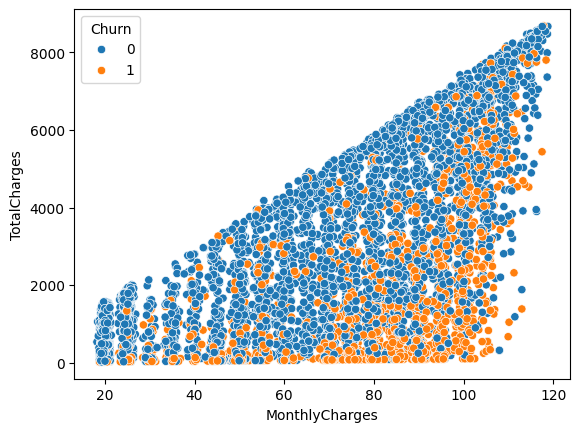

In [85]:
# Scatter plot with color-coded churn status
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')


## Heatmap for correlation matrix

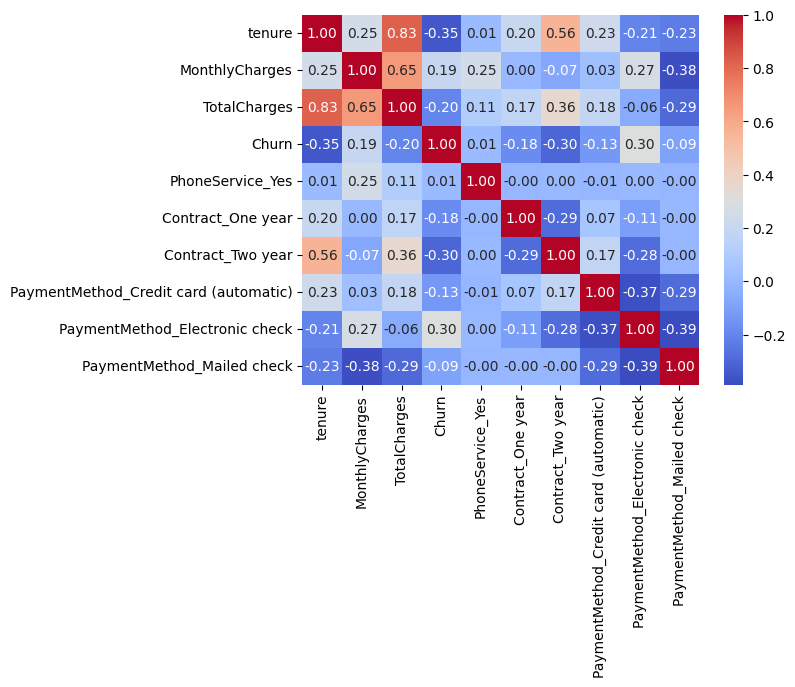

In [86]:

# Convert boolean columns to integers
bool_columns = ['PhoneService_Yes', 'Contract_One year', 'Contract_Two year','PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for column in bool_columns:
    df[column] = df[column].map({'True': 1, 'False': 0}).astype(int)


# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()


# Analysis and Interpretation

## Model Evaluation Metrics

Accuracy: 0.79

Confusion Matrix

[[930 106]
 [183 190]]

Classification Report

```shell 
	    precision	    recall	  f1-score	    support
0       	0.84      	0.90      0.87      	1036
1       	0.64      	0.51      0.57       	373
```


```shell
accuracy                           		0.79      1409
macro avg       	0.74      0.70      0.72      1409
weighted avg       	0.78      0.79      0.79      1409
```

**Interpretation**

Accuracy - The model achieved an accuracy of 79%, which represents the overall correct predictions out of the total predictions.

Confusion Matrix - The confusion matrix provides a detailed breakdown of the model's predictions:

    True Negatives (TN) for class 0 (non-churn): 930
    True Positives (TP) for class 1 (churn): 190
    False Positives (FP): 106 (Predicted as non-churn but actually churn)
    False Negatives (FN): 183 (Predicted as churn but actually non-churn)

**Classification Report**

```shell 
Precision (class 0): 0.84 - 84% of the predicted non-churn cases were correct.

Recall (class 0): 0.90 - Out of all actual non-churn cases, the model identified 90% of them.

F1-score (class 0): 0.87 - A balanced measure considering both precision and recall for non-churn class.

Precision (class 1): 0.64 - 64% of the predicted churn cases were correct.

Recall (class 1): 0.51 - Out of all actual churn cases, the model identified 51% of them.

F1-score (class 1): 0.57 - A balanced measure considering both precision and recall for the churn class.
```



The model performs well in predicting non-churn cases (class 0) with high precision (84%) and recall (90%), as indicated by the high F1-score (0.87). However, the model's performance for predicting churn cases (class 1) is not as strong, with lower precision (64%), recall (51%), and F1-score (0.57).

## Histogram with Churn as Hue

The histogram shows the distribution of monthly charges with different colors representing churn and no-churn instances. There is a concentration of churn instances around lower monthly charges, suggesting that customers with lower monthly charges are more likely to churn.

## Bar Plots for Categorical Columns

These bar plots show the distribution of churn (1) and no-churn (0) for different categorical columns.

The bar plots show the distribution of different categorical variables with respect to the target variable Churn. Each bar represents the count of observations for each category, and the bars are color-coded based on the Churn status.

**Interpretation**

PhoneService_Yes -  The majority of customers have phone service (1). The churn distribution shows that customers with phone service tend to have a slightly higher churn rate compared to those without.
Contract_One year and Contract_Two year - Customers with one- and two-year contracts (1) have a lower churn rate compared to those with a month-to-month contract (0).
PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check - Customers with electronic check payment methods (1) have a higher churn rate compared to credit card and mailed check methods.


## Proportions of Churn by PhoneService

The proportions of churn are calculated for different groups based on PhoneService_Yes.

**Churn Proportions by PhoneService**

For customers with PhoneService_Yes being True, approximately 90.9% churned (1) and 9.1% did not churn (0).
For customers with PhoneService_Yes being False, approximately 9.1% churned (1) and 90.9% did not churn (0).

**No Churn Proportions by PhoneService**

For customers with PhoneService_Yes being True, approximately 90.1% did not churn (0) and 9.9% churned (1).
For customers with PhoneService_Yes being False, approximately 9.9% did not churn (0) and 90.1% churned (1).

**Interpretation**

Customers with PhoneService_Yes being True have a higher churn proportion compared to those with PhoneService_Yes being False.
In both cases, whether PhoneService_Yes is True or False, the majority of customers do not churn.
The differences in churn proportions based on PhoneService_Yes suggest that this feature may have some predictive power in relation to churn. Customers with PhoneService_Yes being True seem to have a slightly higher likelihood of churning compared to those with PhoneService_Yes being False.

## Scatter Plot

The scatter plot shows the relationship between MonthlyCharges and TotalCharges, with different colors indicating churn status.
It helps identify patterns and potential differences between churned and non-churned customers.

## Heatmap for Correlation Matrix

The intensity of the color in the heatmap reflects the strength of the correlation. Darker(Red) or lighter(Blue) shades indicate stronger correlations, Positive and Negative correlations respectively, while a neutral color (white) suggests a weaker or no correlation.

